In [1]:
package = "../../"
import sys
import os
package = os.path.abspath(package)
sys.path.append(package)


In [2]:
import numpy as np
import torch
import logging
import sys
import os
import pytest
import glob
from src.trainer.qwen_image_edit_trainer import QwenImageEditTrainer

from src.data.config import load_config_from_yaml
from src.data.dataset import loader
from diffusers.utils import load_image

/home/lilong/.local/envs/myenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [3]:
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s | %(levelname)s | %(name)s: %(message)s",
    handlers=[logging.StreamHandler(sys.stdout)],
    force=True,  # 关键：覆盖已有配置
)
logger = logging.getLogger(__name__)
logger.info("it works")


2025-09-17 22:17:16,057 | INFO | __main__: it works


# 1. Qwen-Image-Edit

# 1.1 Single control

## 1.1.1 Without Lora

In [4]:
IMAGE_PATH='https://n.sinaimg.cn/ent/transform/775/w630h945/20201127/cee0-kentcvx8062290.jpg'
IMAGE_PATH='/mnt/nas/public2/lilong/repos/qwen-image-finetune/.cache/test_input.png'
prompt='change the hair color to dark blue'
prompt_image = load_image(IMAGE_PATH)

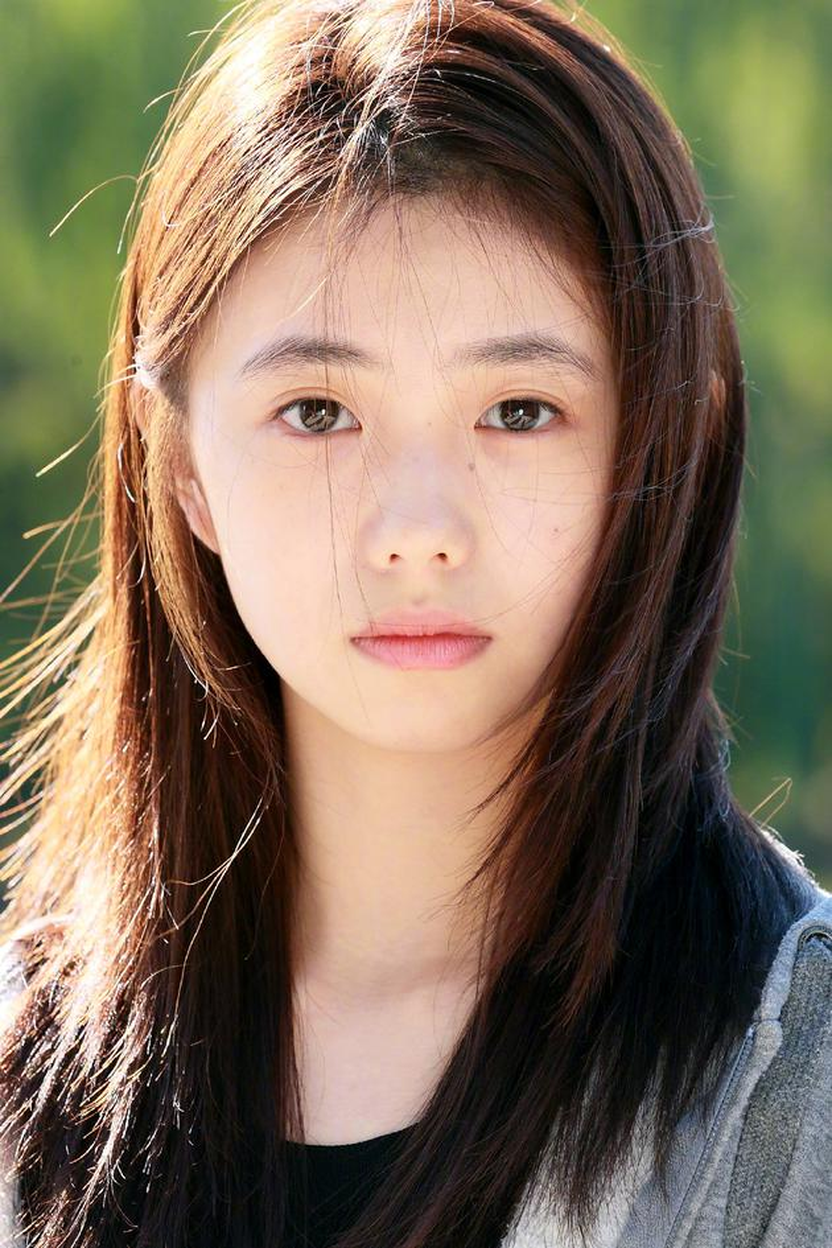

In [5]:
prompt_image

In [6]:
prompt_image.size, prompt

((832, 1248), 'change the hair color to dark blue')

In [7]:
config="../../tests/test_configs/test_example_qwen_image_edit_fp16.yaml"
config = load_config_from_yaml(config)
trainer = QwenImageEditTrainer(config)

2025-09-17 22:17:16,306 | INFO | src.trainer.base_trainer: Batch Size: 16
2025-09-17 22:17:16,307 | INFO | src.trainer.base_trainer: Use Cache: True
2025-09-17 22:17:16,317 | INFO | root: ImageProcessor initialized with target_size: (832, 576)controls_size: [(832, 576)]


In [8]:
config

Config(trainer=<TrainerKind.QwenImageEdit: 'QwenImageEdit'>, resume=None, mode=<TrMode.predict: 'predict'>, model=ModelConfig(pretrained_model_name_or_path='Qwen/Qwen-Image-Edit', pretrained_embeddings=None, lora=LoraConfig(r=16, lora_alpha=16, init_lora_weights='gaussian', target_modules=['to_k', 'to_q', 'to_v', 'to_out.0'], pretrained_weight=None, adapter_name='lora_edit'), quantize=False), data=DataConfig(class_path='src.data.dataset.ImageDataset', init_args=DatasetInitArgs(dataset_path=[{'split': 'train', 'repo_id': 'TsienDragon/face_segmentation_20'}], caption_dropout_rate=0.0, prompt_image_dropout_rate=0.0, cache_dir='/tmp/image_edit_lora/fp16/cache', use_cache=True, use_edit_mask=True, selected_control_indexes=[1], prompt_empty_drop_keys=['prompt_embeds', 'pooled_prompt_embeds'], processor=ImageProcessorConfig(class_path='src.data.preprocess.ImageProcessor', init_args=ImageProcessorInitArgs(process_type='center_crop', resize_mode='bilinear', target_size=[832, 576], controls_size

In [9]:
out = trainer.predict(
    prompt_image=prompt_image,
    prompt=prompt,
    num_inference_steps=20,
    true_cfg_scale=1.0,
    negative_prompt="",
    weight_dtype=torch.bfloat16,
    controls_size=[[1248, 832]],
    best_resolution_size=True,
    height=1248,
    width=832,
    output_type='pil'
)
# save_path = 'tests/test_flux_kontext_trainer.png'
# save_path = os.path.abspath(save_path)

2025-09-17 22:17:19,013 | INFO | root: Loading model...
2025-09-17 22:17:19,014 | INFO | root: Loading QwenImageEditPipeline and separating components...


Loading pipeline components...: 100%|██████████| 4/4 [00:01<00:00,  2.50it/s]

2025-09-17 22:17:21,631 | INFO | root: excution device: cpu


2025-09-17 22:17:22,196 | INFO | root: loaded vae from Qwen/Qwen-Image-Edit with weight_dtype torch.bfloat16


Loading checkpoint shards: 100%|██████████| 5/5 [00:00<00:00, 24.52it/s]


2025-09-17 22:17:23,614 | INFO | root: loaded qwen_vl from Qwen/Qwen-Image-Edit with weight_dtype torch.bfloat16
2025-09-17 22:17:23,615 | INFO | root: text_encoder device: cpu
2025-09-17 22:17:23,615 | INFO | root: load model Qwen/Qwen-Image-Edit


Loading checkpoint shards: 100%|██████████| 9/9 [00:00<00:00, 31.58it/s]


2025-09-17 22:17:25,295 | INFO | root: loaded transformer from Qwen/Qwen-Image-Edit with weight_dtype torch.bfloat16
2025-09-17 22:17:25,317 | INFO | root: Components loaded successfully. VAE scale factor: 8
2025-09-17 22:17:57,494 | INFO | root: setup_model_device_train_mode done


                                    Model Summary: model                                    
┏━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Section     ┃ Metric                              ┃ Value                                ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Parameters  │ Total                               │ 20.43B                               │
│ Parameters  │ Trainable                           │ 0                                    │
│ Parameters  │ Trainable %                         │ 0.00%                                │
│ Parameters  │ Memory (total)                      │ 38.05 GB                             │
│ Parameters  │ Memory (trainable)                  │ 0 B                                  │
│ Modules     │ Total                               │ 2296                                 │
│ Modules     │ Leaf                                │ 1632                                 │
│ Modules     │ Parameterized                       │ 1087                                 │
│ Transformer │ Attention blocks (total/self/cross) │ 60/60/0                              │
│ Transformer │ Heads (hist)                        │ 24×60                                │
│ Transformer │ Attn hidden dim (hist)              │ 3072×60                              │
│ Transformer │ Norms                               │ RMSNorm×241, LayerNorm×241           │
│ Transformer │ FeedForward blocks                  │ 304                                  │
│ LoRA        │ Blocks                              │ 0                                    │
│ LoRA        │ Parameters                          │ 0                                    │
│ LoRA        │ Params % of total                   │ 0.00%                                │
│ LoRA        │ Ranks (hist)                        │                                      │
│ LoRA        │ Rank min/max                        │                                      │
│ DTypes      │ dtype                               │ params(total/train) | % | mem(total) │
│ DTypes      │ bf16                                │ 20.43B/0 | 100.00% | 38.05 GB        │
└─────────────┴─────────────────────────────────────┴──────────────────────────────────────┘

2025-09-17 22:17:57,638 | INFO | root: setup_predict done
2025-09-17 22:17:57,640 | INFO | root: controls_size after best resolution  [(1248, 832)]
2025-09-17 22:17:57,641 | INFO | root: controls_size for processing [(1248, 832)]
control shape torch.Size([1, 3, 1248, 832])
width height 832 1248
2025-09-17 22:17:57,670 | INFO | root: target shape for generation 832, 1248
data keys dict_keys(['control', 'prompt', 'height', 'width', 'n_controls', 'negative_prompt', 'num_inference_steps', 'true_cfg_scale', 'guidance'])
control <class 'torch.Tensor'>
prompt <class 'list'>
height <class 'int'>
width <class 'int'>
n_controls <class 'int'>
negative_prompt <class 'list'>
num_inference_steps <class 'int'>
true_cfg_scale <class 'float'>
guidance <class 'NoneType'>
2025-09-17 22:17:57,836 | INFO | root: batch["prompt"] ['change the hair color to dark blue']
prompt_embeds_mask shape torch.Size([1, 1364])
prompt_embeds shape torch.Size([1, 1364, 3584])
batch["prompt_control"] torch.Size([1, 3, 1248,

Generating: 100%|██████████| 20/20 [00:26<00:00,  1.30s/it]


In [10]:
out[0].size

(832, 1248)

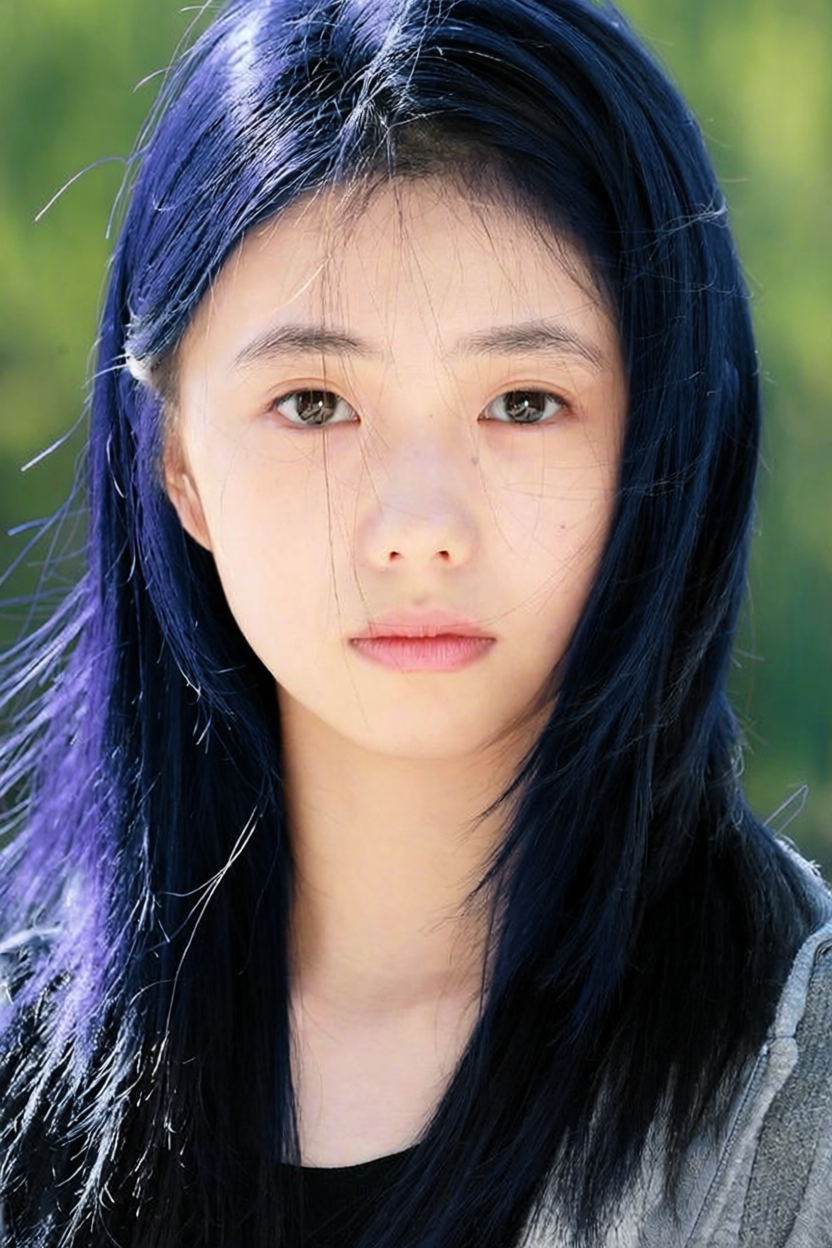

In [11]:
out[0]

## 1.1.2 With Lora Pretrained Weights

In [12]:
LORA_WEIGHT='/raid/lilong/data/experiment/flux-kontext-face_seg_lora_fp16/face_segmentation_lora/v2/checkpoint-199-1000/model.safetensors'
LORA_WEIGHT='TsienDragon/qwen-image-edit-lora-face-segmentation/pytorch_lora_weights.safetensors'


In [19]:
config="../../tests/test_configs/test_example_qwen_image_edit_fp16.yaml"
config = load_config_from_yaml(config)

config.model.lora.pretrained_weight = LORA_WEIGHT
trainer = QwenImageEditTrainer(config)


2025-09-17 22:21:37,458 | INFO | src.trainer.base_trainer: Batch Size: 16
2025-09-17 22:21:37,458 | INFO | src.trainer.base_trainer: Use Cache: True
2025-09-17 22:21:37,458 | INFO | root: ImageProcessor initialized with target_size: (832, 576)controls_size: [(832, 576)]


In [20]:
IMAGE_PATH='https://n.sinaimg.cn/ent/transform/775/w630h945/20201127/cee0-kentcvx8062290.jpg'
prompt='change the image from the face to the face segmentation mask'
prompt_image = load_image(IMAGE_PATH)


In [21]:
prompt_image.size

(630, 945)

In [22]:

out = trainer.predict(
    prompt_image=prompt_image,
    prompt=prompt,
    num_inference_steps=20,
    true_cfg_scale=1.0,
    negative_prompt="",
    weight_dtype=torch.bfloat16,
    height=945,
    width=630,
    output_type='pil'
)
# save_path = 'tests/test_flux_kontext_trainer.png'
# save_path = os.path.abspath(save_path)

2025-09-17 22:21:40,299 | INFO | root: Loading model...
2025-09-17 22:21:40,302 | INFO | root: Loading QwenImageEditPipeline and separating components...


Loading pipeline components...: 100%|██████████| 4/4 [00:02<00:00,  1.90it/s]

2025-09-17 22:21:42,962 | INFO | root: excution device: cpu


2025-09-17 22:21:43,668 | INFO | root: loaded vae from Qwen/Qwen-Image-Edit with weight_dtype torch.bfloat16


Loading checkpoint shards: 100%|██████████| 5/5 [00:00<00:00, 23.44it/s]


2025-09-17 22:21:45,048 | INFO | root: loaded qwen_vl from Qwen/Qwen-Image-Edit with weight_dtype torch.bfloat16
2025-09-17 22:21:45,049 | INFO | root: text_encoder device: cpu
2025-09-17 22:21:45,049 | INFO | root: load model Qwen/Qwen-Image-Edit


Loading checkpoint shards: 100%|██████████| 9/9 [00:00<00:00, 19.43it/s]


2025-09-17 22:21:47,395 | INFO | root: loaded transformer from Qwen/Qwen-Image-Edit with weight_dtype torch.bfloat16
2025-09-17 22:21:47,417 | INFO | root: Components loaded successfully. VAE scale factor: 8
2025-09-17 22:21:47,422 | INFO | root: load lora from pretrained weight
2025-09-17 22:21:52,172 | INFO | root: set_lora: DIFFUSERS Loaded lora from /home/lilong/.cache/huggingface/hub/models--TsienDragon--qwen-image-edit-lora-face-segmentation/snapshots/847ede43e3aaa4174e1ede1435f513acd7d0456b/pytorch_lora_weights.safetensors for lora_edit
2025-09-17 22:21:52,174 | INFO | root: set_lora: Loaded lora from /home/lilong/.cache/huggingface/hub/models--TsienDragon--qwen-image-edit-lora-face-segmentation/snapshots/847ede43e3aaa4174e1ede1435f513acd7d0456b/pytorch_lora_weights.safetensors
2025-09-17 22:22:23,294 | INFO | root: setup_model_device_train_mode done


                                    Model Summary: model                                    
┏━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Section     ┃ Metric                              ┃ Value                                ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Parameters  │ Total                               │ 20.45B                               │
│ Parameters  │ Trainable                           │ 0                                    │
│ Parameters  │ Trainable %                         │ 0.00%                                │
│ Parameters  │ Memory (total)                      │ 38.10 GB                             │
│ Parameters  │ Memory (trainable)                  │ 0 B                                  │
│ Modules     │ Total                               │ 4696                                 │
│ Modules     │ Leaf                                │ 3072                                 │
│ Modules     │ Parameterized                       │ 1567                                 │
│ Transformer │ Attention blocks (total/self/cross) │ 60/60/0                              │
│ Transformer │ Heads (hist)                        │ 24×60                                │
│ Transformer │ Attn hidden dim (hist)              │ 3072×60                              │
│ Transformer │ Norms                               │ RMSNorm×241, LayerNorm×241           │
│ Transformer │ FeedForward blocks                  │ 604                                  │
│ LoRA        │ Blocks                              │ 480                                  │
│ LoRA        │ Parameters                          │ 23.59M                               │
│ LoRA        │ Params % of total                   │ 0.12%                                │
│ LoRA        │ Ranks (hist)                        │ r=16×480                             │
│ LoRA        │ Rank min/max                        │ 16 / 16                              │
│ DTypes      │ dtype                               │ params(total/train) | % | mem(total) │
│ DTypes      │ bf16                                │ 20.45B/0 | 100.00% | 38.10 GB        │
└─────────────┴─────────────────────────────────────┴──────────────────────────────────────┘

2025-09-17 22:22:23,494 | INFO | root: setup_predict done
2025-09-17 22:22:23,507 | INFO | root: controls_size for processing None
control shape torch.Size([1, 3, 832, 576])
width height 630 945
2025-09-17 22:22:23,527 | INFO | root: target shape for generation 624, 944
data keys dict_keys(['control', 'prompt', 'height', 'width', 'n_controls', 'negative_prompt', 'num_inference_steps', 'true_cfg_scale', 'guidance'])
control <class 'torch.Tensor'>
prompt <class 'list'>
height <class 'int'>
width <class 'int'>
n_controls <class 'int'>
negative_prompt <class 'list'>
num_inference_steps <class 'int'>
true_cfg_scale <class 'float'>
guidance <class 'NoneType'>
2025-09-17 22:22:23,531 | INFO | root: batch["prompt"] ['change the image from the face to the face segmentation mask']
prompt_embeds_mask shape torch.Size([1, 648])
prompt_embeds shape torch.Size([1, 648, 3584])
batch["prompt_control"] torch.Size([1, 3, 832, 576])
do true cfg False has neg prompt True true_cfg_scale 1.0
2025-09-17 22:2

Generating: 100%|██████████| 20/20 [00:14<00:00,  1.35it/s]


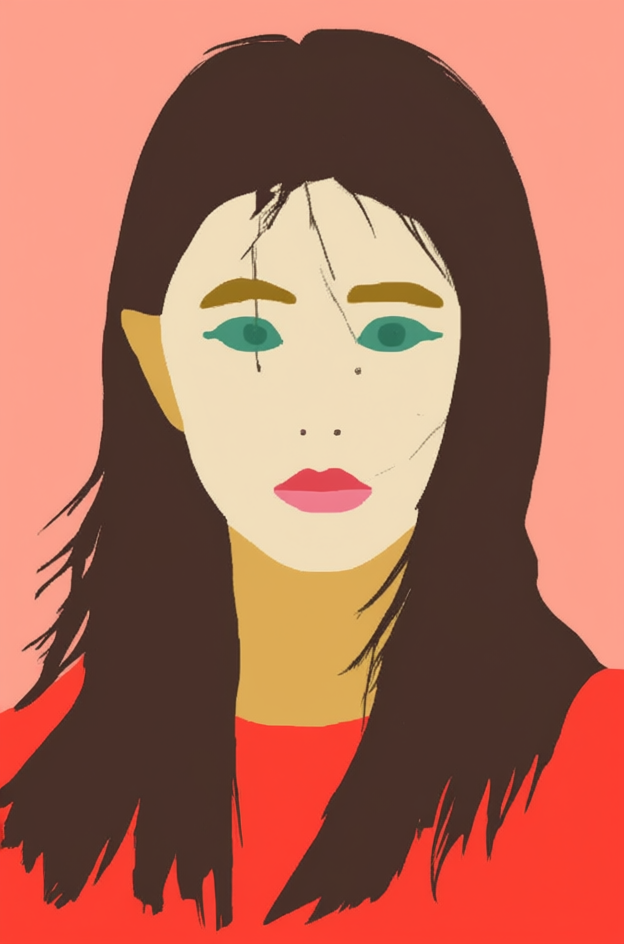

In [23]:
out[0]

## 1.2 Multi Control

In [ ]:
LORA_WEIGHT='/tmp/image_edit_lora/character_composition_fp16/characterCompositionFluxKontextFp16/v0/checkpoint-549-1100/model.safetensors'

config="../../tests/test_configs/test_example_fluxkontext_fp16_character_composition.yaml"
config = load_config_from_yaml(config)

config.model.lora.pretrained_weight = LORA_WEIGHT
trainer = FluxKontextLoraTrainer(config)


In [ ]:
from PIL import Image

def pad_to_square(img: Image.Image, fill=None):
    """Pad to square without resizing; centered content.
    fill: background color.
          - For RGB: (r,g,b) e.g. (255,255,255)
          - For RGBA: (r,g,b,a) e.g. (255,255,255,0) to keep transparency
          - If None: auto-choose (transparent if RGBA, white otherwise)
    """
    w, h = img.size
    side = max(w, h)

    if img.mode == "RGBA":
        bg_color = (255, 255, 255, 0) if fill is None else fill
        background = Image.new("RGBA", (side, side), bg_color)
    else:
        bg_color = (255, 255, 255) if fill is None else fill
        # convert to RGB if palette/L, etc., so fill works as expected
        if img.mode not in ("RGB", "L"):
            img = img.convert("RGB")
        background = Image.new(background_mode := ("L" if img.mode == "L" else "RGB"),
                               (side, side), bg_color)

    offset = ((side - w) // 2, (side - h) // 2)
    background.paste(img, offset)
    return background



In [ ]:
import requests
from io import BytesIO
from PIL import Image
control_1 = load_image('https://cdn.shopify.com/s/files/1/0705/5491/0959/files/100_dfdf593d-bc73-4bb5-8d23-9181d510f628_480x480.webp')

In [ ]:
control_1.size

In [ ]:
import requests
from PIL import Image
from io import BytesIO

image_file="https://cdna.artstation.com/p/assets/images/images/027/134/318/large/pang-ying-ep03-scene-sc037.jpg?1590684056"
prompt_image = load_image(image_file).convert('RGB')

In [ ]:
prompt_image

In [ ]:
control_1

In [ ]:
prompt

In [ ]:
out = trainer.predict(
    prompt_image=prompt_image,
    prompt=prompt,
    num_inference_steps=20,
    true_cfg_scale=1.0,
    negative_prompt="",
    weight_dtype=torch.bfloat16,
    height=384,
    width=672,
    controls_size=[[384,672],[512,512]],
    additional_controls=[[control_1]],
    output_type='pil'
)
# save_path = 'tests/test_flux_kontext_trainer.png'
# save_path = os.path.abspath(save_path)

In [ ]:
out[0]

In [ ]:
out[0].size